## Homework 2
---
<b>Let's apply a few of the statistical inference concepts we've learned</b>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import random

import matplotlib.pyplot as plt
from matplotlib import rcParams
dark2_colors = ['#2b8cbe',
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 5)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['axes.edgecolor'] = 'white'
rcParams['patch.edgecolor'] = 'none'

### Q1.
#### Simulate a person rolling a die 10,000 times and plot the distribution of their results

(array([ 1641.,  1685.,  1656.,  1648.,  1698.,  1672.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

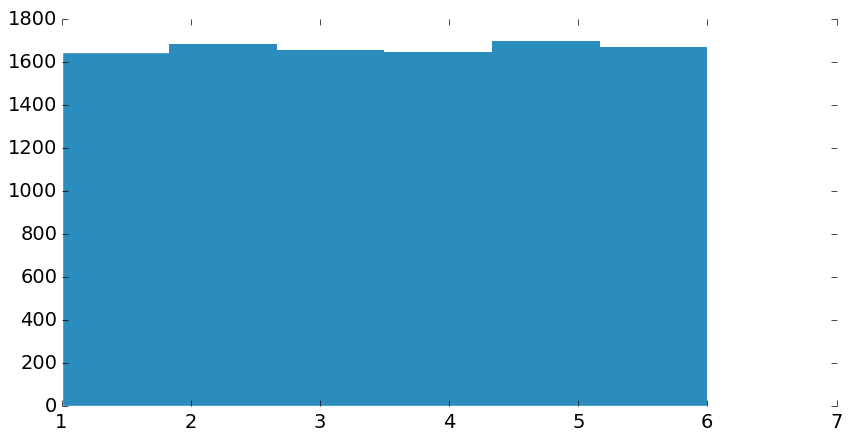

In [2]:
# roll the die 1000 times
roll = np.random.randint(1,7,size=(10000))

plt.hist(roll,bins=6)

In [3]:
roll.mean()

3.5093000000000001

#### Simulate a person rolling 10 die 10,000 times and plot the distribution of their total results

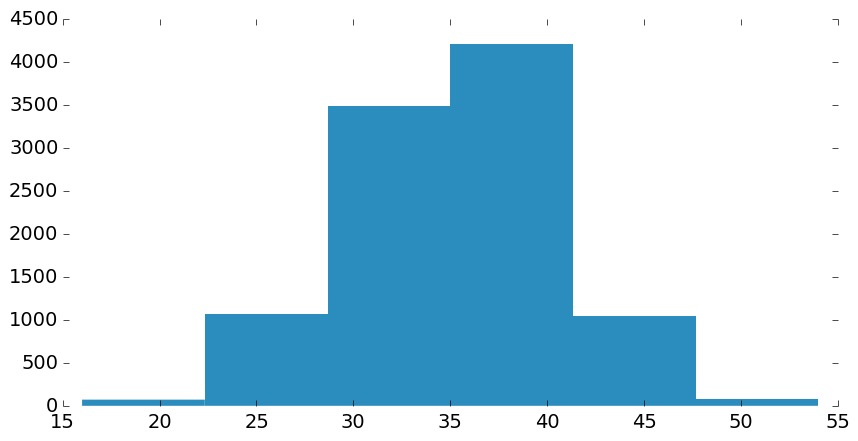

In [5]:
sample_10 = []
for i in range(10):
    sample_10.append(np.random.randint(1,7,10000))
    
sample_10 = pd.DataFrame(sample_10).sum(axis=0).values
    
plt.hist(sample_10,bins=6)
plt.show()

#### Simulate a person rolling 1,000 die 10,000 times and plot the distribution of their total results.

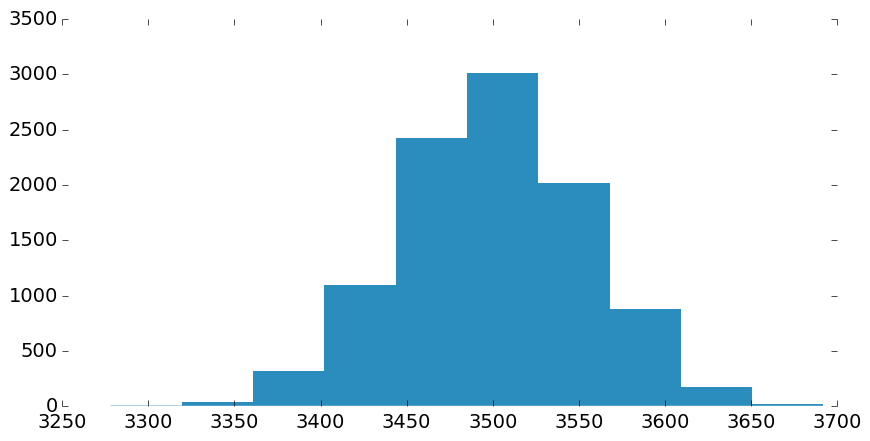

In [6]:
sample_100K = []
for i in range(1000):
    sample_100K.append(np.random.randint(1,7,10000))
    
sample_100K = pd.DataFrame(sample_100K).sum(axis=0).values
    
plt.hist(sample_100K,bins=10)
plt.show()

#### What distribution does this look like? Why?

Normal. As the sample size increases, the sampling distribution approaches the normal distribution (central limit theorem). 

---
### Q2.

#### Using simulation, show that $\sqrt{\frac{\sum{(x - \bar{x})^2}}{n - 1}}$ is an unbiased estimator of the population std deviation and that $\sqrt{\frac{\sum{(x - \bar{x})^2}}{n}}$ is a biased estimator

Tip: try repeatedly drawing from a distribution with a known standard deviation and looking at how the distribution of unbiased estimators compares with the distribution of biased estimators.
The effect will be more noticable if you use draws of small sample size (i.e. draw 5 data points 10,000 times and calculate the std devs using the two methods)

In [7]:
np.random.normal(0,1)

-0.8231857843030583

In [8]:
draws = np.random.normal(0,1,size=100000)

In [9]:
def unbiased(draws):
    n = len(draws)
    x_bar = np.mean(draws)
    return np.sqrt((np.sum(draws-x_bar)/(n-1)))

unbiased(draws)

nan

In [10]:
# unbiased estimate
np.std(draws,ddof=1)

1.0017881324340623

In [11]:
# biased estimate
np.std(draws,ddof=0)

1.0017831234808776

In [12]:
# with new tip...
biased = []
unbiased = []
for i in range(10000):
    draws2 = np.random.normal(0, 1, size=5)
    biased.append(np.std(draws2, ddof=0))
    unbiased.append(np.std(draws2, ddof=1))

([array([  237.,  1496.,  2769.,  2865.,  1758.,   669.,   160.,    38.,
             8.,     0.]),
  array([  157.,  1077.,  2258.,  2673.,  2183.,  1088.,   423.,   105.,
            29.,     7.])],
 array([ 0.06302649,  0.30406156,  0.54509663,  0.7861317 ,  1.02716676,
         1.26820183,  1.5092369 ,  1.75027196,  1.99130703,  2.2323421 ,
         2.47337717]),
 <a list of 2 Lists of Patches objects>)

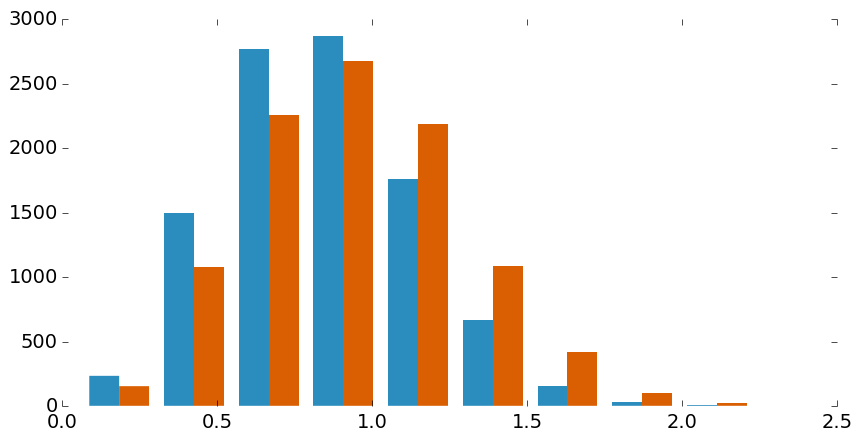

In [13]:
plt.hist([biased,unbiased])

---
### Q3. 

#### Using data from [realclearpolitics.com](http://www.realclearpolitics.com/epolls/2016/president/us/general_election_trump_vs_clinton_vs_johnson_vs_stein-5952.html) run hypothesis tests on at least 10 recent polls to determine whether Trump has significantly more than 45% of voters supporting him
Extra credit: don't copy and paste the data, write a script to scrape the data from realclearpolitics  
Read here for more explanation on hypothesis testing with one proportion http://isites.harvard.edu/fs/docs/icb.topic116457.files/Review_Session_Slides_-_Part_2_-_Yves.pdf

Null hypothesis: Trump has significantly more than 45% of voters supporting him
Alternative hypothesis: Trump does not have significantly more than 45% of voters supporting him.

<b>Fox News</b>

In [14]:
# sample size = n
# p_0 = Clinton
# p_hat = Trump

fox_n = 917

fox_p_0 = 0.45
fox_p_hat = 0.38

# one sample test of proportions
t_stat = (fox_p_hat - fox_p_0)/np.sqrt((fox_p_0 * (1-fox_p_0))/fox_n)
t_stat
# over 4 std dev away from mean, so extreme case! 

-4.2608388229018326

In [15]:
1 - stats.norm.cdf(t_stat)
# p value is 1, super far from 0! 

0.99998981694639755

<b>Rasmussen Reports</b>

In [16]:
ras_n = 1500

ras_p_0 = 0.41
ras_p_hat = 0.43

# one sample test of proportions
t_stat = (ras_p_hat - ras_p_0)/np.sqrt((ras_p_0 * (1-ras_p_0))/ras_n)
t_stat

1.5749170729561344

<b>NBC News/Wall St Jml</b>

In [17]:
nbc_n = 2363

nbc_p_0 = 0.44
nbc_p_hat = 0.37

# one sample test of proportions
t_stat = (nbc_p_hat - nbc_p_0)/np.sqrt((nbc_p_0 * (1-nbc_p_0))/nbc_n)
t_stat
# over 6 std dev away, even more extreme case! 

-6.8550329884492376

<b>Reuters</b>

In [18]:
reut_n = 806

reut_p_0 = 0.46
reut_p_hat = 0.37

# one sample test of proportions
t_stat = (reut_p_hat - reut_p_0)/np.sqrt((reut_p_0 * (1-reut_p_0))/reut_n)
t_stat

-5.1266566781531395

<b>Economist</b>

In [19]:
econ_n = 971

econ_p_0 = 0.44
econ_p_hat = 0.38

# one sample test of proportions
t_stat = (econ_p_hat - econ_p_0)/np.sqrt((econ_p_0 * (1-econ_p_0))/econ_n)
t_stat

-3.7665220444978558

<b>NBC/SM</b>

In [20]:
sm_n = 23329

sm_p_0 = 0.46
sm_p_hat = 0.41

# one sample test of proportions
t_stat = (sm_p_hat - sm_p_0)/np.sqrt((sm_p_0 * (1-sm_p_0))/sm_n)
t_stat
# over 15 std dev away... 

-15.32294596700944

<b>Quinnipiac</b>

In [21]:
q_n = 1064

q_p_0 = 0.45
q_p_hat = 0.40

# one sample test of proportions
t_stat = (q_p_hat - q_p_0)/np.sqrt((q_p_0 * (1-q_p_0))/q_n)
t_stat

-3.2783341421329739

<b>Gravis</b>

In [22]:
g_n = 1690

g_p_0 = 0.44
g_p_hat = 0.44

# one sample test of proportions
t_stat = (g_p_hat - g_p_0)/np.sqrt((g_p_0 * (1-g_p_0))/g_n)
t_stat

0.0

<b>CNN</b>

In [23]:
cnn_n = 1213

cnn_p_0 = 0.47
cnn_p_hat = 0.42

# one sample test of proportions
t_stat = (cnn_p_hat - cnn_p_0)/np.sqrt((cnn_p_0 * (1-cnn_p_0))/cnn_n)
t_stat

-3.4891009977904064

<b>PPP</b>

In [24]:
ppp_n = 933

ppp_p_0 = 0.44
ppp_p_hat = 0.40

# one sample test of proportions
t_stat = (ppp_p_hat - ppp_p_0)/np.sqrt((ppp_p_0 * (1-ppp_p_0))/ppp_n)
t_stat

-2.4613901678607459

#### Look carefully at 4 of the polls you tested. What are potential sources of bias resulting from the survey design and methods. How will this influence the survey results?

Your answers here: Some news outlets may be pro-democrat or pro-republican, could cause some bias. Other sources of bias when it comes to survey design includes sampling that's not done randomly. Some examples include undercoverage (some members of population aren't really represented in sample), nonresponse bias (some folks aren't willing or unable to participate), or voluntary response bias (sample members are self-selected volunteers).